In [186]:
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sbn; sbn.set()
import os
import numpy as np
import pandas as pd
import _pickle as pickle
from data_prepare import categorical_factory

In [187]:
import collections

def flatten_dict(d, parent_key='', sep='_'):
    items = []
    for k, v in d.items():
        new_key = parent_key + sep + k if parent_key else k
        if isinstance(v, collections.MutableMapping):
            items.extend(flatten_dict(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)

In [188]:
figsize = (21, 7)

In [189]:
test_name = 'params_select'
test_id = 'zz500_10'
# test_id = 'xxxx03'
test_dir = './' + test_name + '_' + test_id + '/' 

# ohlcv

In [190]:
ohlcv_list_file = os.path.join(test_dir, 'ohlcv_list.pkl')
ohlcv_list = pickle.load(open(ohlcv_list_file, 'rb'))
ohlcvs = pd.concat(ohlcv_list, axis=0)

# subtest

In [191]:
df_params = pd.DataFrame()
features_list_dict = {}
df_data_set = pd.DataFrame()
df_historys = pd.DataFrame()
df_performances = pd.DataFrame()
for root, dirs, files in os.walk(test_dir, topdown=False):
    identity = os.path.basename(root)
    for name in files:
        with open(os.path.join(root, name), 'rb') as f:
            data = pickle.load(f)
            if name == 'params.pkl':
                params = data
                params['id'] = identity
                df_params = df_params.append(flatten_dict(params), ignore_index=True)
            if name == 'features_list.pkl':
                features_list = data
                features_list_dict[identity] = features_list
            if name == 'data_set.pkl':
                data_set = data
                data_set['id'] = identity
                df_data_set = df_data_set.append(flatten_dict(data_set), ignore_index=True)
            if name == 'history.pkl':
                history = data
                df_historys = df_historys.append({'id': identity, 'history': history}, ignore_index=True)
            if name == 'performances.pkl':
                performances = data
                performances['id'] = identity
                df_performances = df_performances.append(flatten_dict(performances), ignore_index=True)

df_params = df_params.set_index('id')
df_data_set = df_data_set.set_index('id')
df_historys = df_historys.set_index('id')
df_performances = df_performances.set_index('id')

In [192]:
df_performances.columns

Index(['test_Y', 'test_Y0', 'test_annual_return', 'test_cum_returns',
       'test_loss', 'test_metrics', 'test_returns', 'test_sharpe_ratio',
       'validate_Y', 'validate_Y0', 'validate_annual_return',
       'validate_cum_returns', 'validate_loss', 'validate_metrics',
       'validate_returns', 'validate_sharpe_ratio'],
      dtype='object')

In [193]:
perf = df_performances[['validate_annual_return', 'validate_sharpe_ratio', 'validate_loss', 'validate_metrics', 
                        'test_annual_return', 'test_sharpe_ratio', 'test_loss', 'test_metrics']]

In [194]:
df_params.columns

Index(['features_kline_window', 'features_label_by_ma_price_next_ma_window',
       'features_label_by_ma_price_quantile_list',
       'features_label_by_ma_price_window', 'features_ma_ma_list',
       'features_ma_price', 'features_ma_window', 'lstm_activation_last',
       'lstm_batch_size', 'lstm_bias_initializer', 'lstm_dropout',
       'lstm_epochs', 'lstm_kernel_initializer', 'lstm_layer1_activation',
       'lstm_layer1_is_BN', 'lstm_layer1_units', 'lstm_layer2_activation',
       'lstm_layer2_is_BN', 'lstm_layer2_units', 'lstm_layer3_activation',
       'lstm_layer3_is_BN', 'lstm_layer3_units', 'lstm_loss_type', 'lstm_lr',
       'lstm_recurrent_dropout', 'lstm_shuffle', 'lstm_time_steps',
       'split_dates'],
      dtype='object')

In [195]:
p_cols = ['features_kline_window', 'features_label_by_ma_price_next_ma_window',
       'features_label_by_ma_price_quantile_list', 
       'features_label_by_ma_price_window', 
       'features_ma_window', 'lstm_batch_size', 'lstm_dropout',
       'lstm_epochs', 'lstm_layer1_is_BN', 'lstm_layer1_units', 'lstm_layer2_is_BN', 'lstm_layer2_units',
       'lstm_layer3_is_BN', 'lstm_layer3_units', 'lstm_lr',
       'lstm_recurrent_dropout', 'lstm_shuffle', 'lstm_time_steps']

In [196]:
parameters = df_params.loc[:, p_cols]

In [197]:
perf_vs_params = pd.concat([perf, parameters], axis=1)

In [198]:
top_validate = perf_vs_params.sort_values('validate_sharpe_ratio', ascending=0).head(8)
top_test = perf_vs_params.sort_values('test_sharpe_ratio', ascending=0).head(8)

In [199]:
tv = top_validate.mean()

In [200]:
tt = top_test.mean()

In [201]:
pd.concat([tv, tt], axis=1)

,0,1
validate_annual_return,0.382357,0.150386
validate_sharpe_ratio,1.845797,0.791150
validate_loss,1.094953,1.107081
validate_metrics,0.412109,0.380859
test_annual_return,0.008230,0.072656
test_sharpe_ratio,0.118312,0.855383
test_loss,1.082652,1.102884
test_metrics,0.400391,0.383464
features_label_by_ma_price_next_ma_window,3.000000,3.000000
features_label_by_ma_price_window,60.000000,60.000000


In [202]:
pd.concat([top_validate, top_test], axis=0).mean()

validate_annual_return                          0.266371
validate_sharpe_ratio                           1.353629
validate_loss                                   1.101017
validate_metrics                                0.396484
test_annual_return                              0.040443
test_sharpe_ratio                               0.486847
test_loss                                       1.092768
test_metrics                                    0.391927
features_label_by_ma_price_next_ma_window       3.000000
features_label_by_ma_price_window              60.000000
lstm_batch_size                                64.000000
lstm_dropout                                    0.300000
lstm_epochs                                  1700.000000
lstm_layer1_is_BN                               0.750000
lstm_layer1_units                              64.000000
lstm_layer2_is_BN                               0.187500
lstm_layer2_units                              52.000000
lstm_layer3_is_BN              

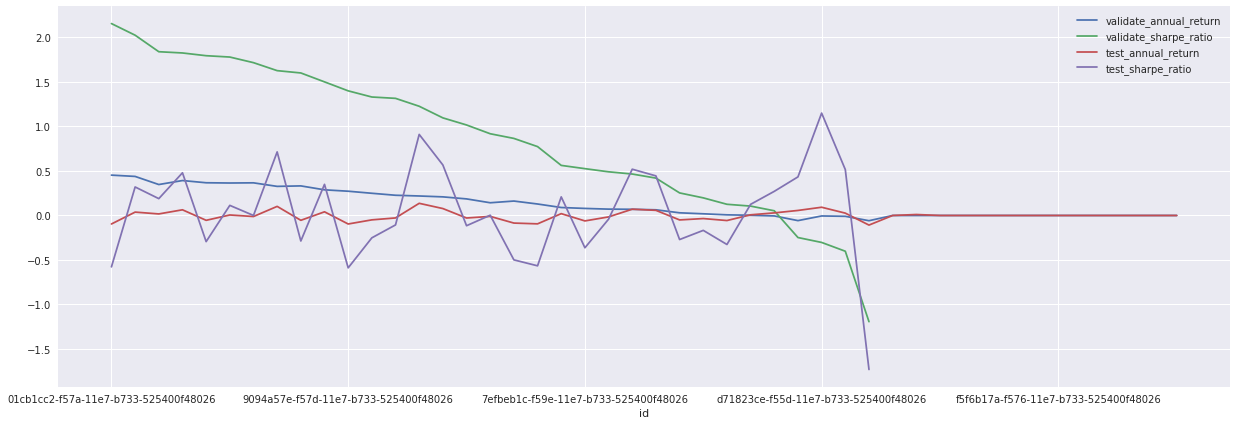

In [203]:
top = perf.sort_values('validate_sharpe_ratio', ascending=0)
top[['validate_annual_return', 'validate_sharpe_ratio', 'test_annual_return', 'test_sharpe_ratio']].plot(figsize=figsize)

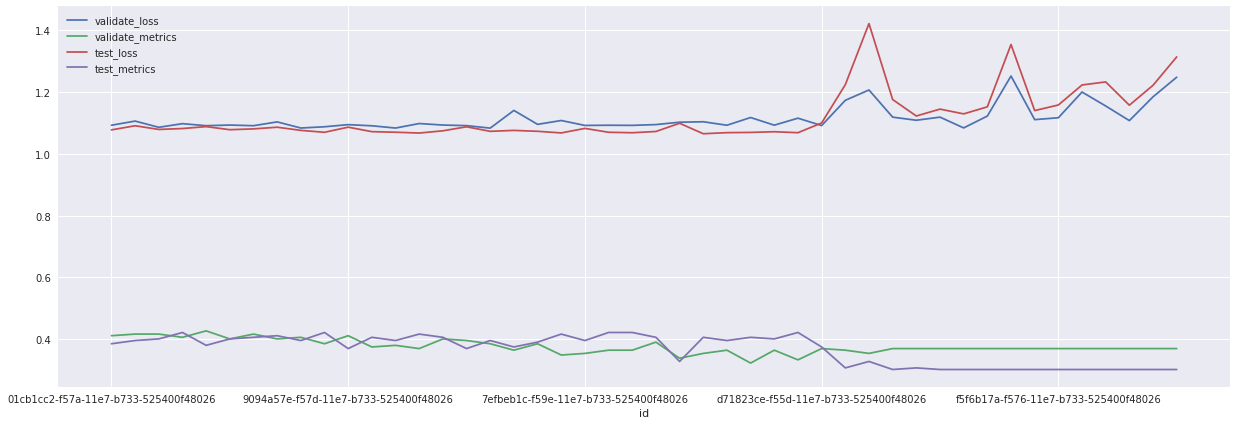

In [204]:
top[['validate_loss', 'validate_metrics', 'test_loss', 'test_metrics']].plot(figsize=figsize)

In [166]:
top

,validate_annual_return,validate_sharpe_ratio,validate_loss,validate_metrics,test_annual_return,test_sharpe_ratio,test_loss,test_metrics
id,,,,,,,,
46519264-f556-11e7-b733-525400f48026,0.186348,1.016830,1.091148,0.395833,-0.028386,-0.114967,1.087427,0.369792
a91fe146-f553-11e7-b733-525400f48026,0.071434,0.490615,1.092412,0.364583,-0.015943,-0.041369,1.069680,0.421875
a3761af4-f557-11e7-b733-525400f48026,0.018960,0.197941,1.103668,0.354167,-0.034554,-0.167240,1.064915,0.406250
52d15212-f552-11e7-b733-525400f48026,0.000000,NaN,1.118620,0.369792,0.000000,NaN,1.175497,0.302083


In [ ]:
perf_vs_params.loc['975c812c-f525-11e7-b733-525400f48026']

In [ ]:
perf_vs_params.loc['975c812c-f525-11e7-b733-525400f48026']

In [ ]:
labels = train_ohlcv['label2'].unique().tolist()
        labels.sort()
        colors = cm.rainbow(np.linspace(0, 1, len(labels)))
        for i in range(len(labels)):
            label = labels[i]
            c = colors[i]
            selected = train_ohlcv[train_ohlcv['label2'] == label]
            print("{}: {}".format(label, len(selected) / len(train_ohlcv)))
            if len(selected) > 0:
                selected.plot.scatter(x='index', y='close', s=10, c=c, figsize=(21, 7), ax=ax, label=label)

In [ ]:
nb_class = 3
class_list = [i for i in range(nb_class)]
_, reverse_categorical = categorical_factory(class_list)
data['label2'] = data['label'].map(reverse_categorical)

In [ ]:
data.index.get_level_values(level=0).unique()

In [ ]:
stk = '000905'
idx_slice = pd.IndexSlice
stk_data_raw = data.loc[idx_slice[stk,:]]

In [ ]:
stk_data = stk_data_raw.reset_index().reset_index()

In [ ]:
fig, ax = plt.subplots(1, figsize=figsize)
stk_data['close'].plot(x='index', y='close', figsize=figsize, ax=ax)
stk_data[stk_data['label2'] == 2].plot.scatter(x='index', y='close', s=20, c='r', figsize=figsize, ax=ax)
stk_data[stk_data['label2'] == 0].plot.scatter(x='index', y='close', s=20, c='g', figsize=figsize, ax=ax)
stk_data[stk_data['label2'] == 1].plot.scatter(x='index', y='close', s=20, c='b', figsize=figsize, ax=ax)
plt.show()

In [ ]:
result = pickle.load(open(os.path.join(sub_dir, 'performances.pkl'), 'rb'))

In [ ]:
validate_result = result['validate']
test_result = result['test']

In [ ]:
close_price = stk_data_raw['close']

In [ ]:
close_price.head()

In [ ]:
vy = validate_result['Y']
ty = test_result['Y']

In [ ]:
vy0 = validate_result['Y0']
ty0 = test_result['Y0']
tvy0 = pd.concat([vy0, ty0], axis=0)

In [ ]:
tvy0.head(64).head(10)

In [ ]:
tvy0.head(128).tail(64).head(10)

In [ ]:
test = pd.concat([tvy0.map(lambda x: x[0]), 
                  tvy0.map(lambda x: x[1]), 
                  tvy0.map(lambda x: x[2])], axis=1)

In [ ]:
plt.close()
test.plot(figsize=figsize)
plt.show()

In [ ]:
y = pd.concat([tvy0.map(np.argmax), tvy0.map(np.max)], axis=1)

In [ ]:
y= y.reset_index().set_index('date').drop(columns=['code'])

In [ ]:
y.columns = ['label', 'prob']

In [ ]:
predict = pd.concat([close_price, y], axis=1).dropna()

In [ ]:
plt.close()
predict['prob'].plot(figsize=figsize)
plt.show()

In [ ]:
predict['pct_changes'] = predict['close'].pct_change()

In [ ]:
predict['label'] = predict['label'] -1

In [ ]:
predict['label'] = predict['label'].shift(1)

In [ ]:
predict['profit'] = predict['label'] * predict['pct_changes']

In [ ]:
predict = predict.fillna(0)

In [ ]:
predict['profit2'] = 0

In [ ]:
predict.loc[predict['prob']>0.7, 'profit2'] = predict.loc[predict['prob']>0.7, 'profit']

In [ ]:
(predict['profit2'] + 1).cumprod().plot(figsize=(21, 7))
(predict['pct_changes'] + 1).cumprod().plot(figsize=(21, 7))

In [ ]:
stk_predict = predict.reset_index().reset_index()
fig, ax = plt.subplots(1, figsize=figsize)
stk_predict.plot(x='level_0', y='close', figsize=figsize, ax=ax)
# stk_predict.plot(x='level_0', y='prob', figsize=figsize, ax=ax)
stk_predict[stk_predict['label'] == 0].plot.scatter(x='level_0', y='close', s=20, c='g', figsize=figsize, ax=ax)
stk_predict[stk_predict['label'] == 2].plot.scatter(x='level_0', y='close', s=20, c='r', figsize=figsize, ax=ax)
stk_predict[stk_predict['label'] == 0].plot.scatter(x='level_0', y='close', s=20, c='g', figsize=figsize, ax=ax)

In [ ]:
plt.close()
test_result['Y'].plot()
plt.show()

In [ ]:
stk_data.columns

In [ ]:
i_columns = ['ma_1', 'ma_2', 'ma_3', 'ma_5', 'ma_8', 'ma_13', 'ma_21', 'ma_34', 'ma_55', 'ma_60', 'ma_120', 'ma_240', 'ma_480']
# i_columns = ['open_close_960', 'high_close_960', 'low_close_960']
# i_columns = ['pct_chg_960']
# i_columns = ['volume_960']
stk_data.loc[:, i_columns].plot(figsize=figsize)
plt.show()

In [ ]:
df_historys = pd.DataFrame()
df_params = pd.DataFrame()
df_validate = pd.DataFrame()
df_test = pd.DataFrame()
for root, dirs, files in os.walk(test_dir, topdown=False):
    identity = os.path.basename(root)
    for name in files:
        if name == 'history.pkl':
            with open(os.path.join(root, name), 'rb') as f:
                history = pickle.load(f)
                df_historys = df_historys.append({'id': identity, 'history': history}, ignore_index=True)
        if name == 'params.pkl':
            with open(os.path.join(root, name), 'rb') as f:
                params = pickle.load(f)
                params['id'] = identity
                df_params = df_params.append(params, ignore_index=True)
        if name == 'performances.pkl':
            with open(os.path.join(root, name), 'rb') as f:
                performances = pickle.load(f)
                
                validate = performances['validate']
                validate['id'] = identity
                df_validate = df_validate.append(validate, ignore_index=True)
                
                test = performances['test']
                test['id'] = identity
                df_test = df_test.append(test, ignore_index=True)

In [ ]:
new_test_columns = []
for col in df_test.columns.values.tolist():
    if col != 'id': 
        new_test_columns.append('test_' + col)
    else:
        new_test_columns.append(col)
df_test.columns = new_test_columns

In [ ]:
results = []
for result in [df_historys, df_params, df_validate, df_test]:
    result = result.set_index('id')
    results.append(result)
results = pd.concat(results, axis=1)
results = results.sort_values(['test_annual_return'], ascending=False)

In [ ]:
results.columns

In [ ]:
i_columns = ['activation', 'batch_size', 'dropout', 'epochs',
       'is_BN_1', 'is_BN_2', 'is_BN_3', 'lr',
       'recurrent_dropout', 'shuffle', 'time_steps', 'units1', 'units2',
       'units3', 'annual_return', 'sharpe_ratio', 'test_annual_return', 'test_sharpe_ratio']

In [ ]:
i_results = results.loc[:, i_columns]

In [ ]:
i_results.loc[:, ['annual_return', 'sharpe_ratio', 'test_annual_return', 'test_sharpe_ratio']].plot(figsize=(21, 7))

In [ ]:
i_results.head()

In [ ]:
top = 20
for i in range(top):
    validate_returns = results.iloc[i]['returns']
    test_returns = results.iloc[i]['test_returns']
    (validate_returns.unstack(level=0).fillna(0).mean(axis=1) + 1).cumprod().plot(figsize=(21, 7))
    (test_returns.unstack(level=0).fillna(0).mean(axis=1) + 1).cumprod().plot(figsize=(21, 7))
    plt.show()

In [ ]:
for i in range(top):
    validate_returns = results.iloc[i]['returns']
    test_returns = results.iloc[i]['test_returns']
    validate_returns_per_stk = (validate_returns.unstack(level=0).fillna(0) + 1).cumprod()
    test_returns_per_stk = (test_returns.unstack(level=0).fillna(0) + 1).cumprod()
    returns_per_stk = pd.concat([validate_returns_per_stk, test_returns_per_stk], axis=1)
    returns_per_stk.plot(figsize=(21, 7))
    plt.show()

In [ ]:
data_set = pickle.load(open(os.path.join(test_dir, 'data.pkl'), 'rb'))

In [ ]:
data_set['test']

In [ ]:
idx_slice = pd.IndexSlice
data_set['test'].loc[idx_slice[('603228.XSHG',)]]

In [ ]:
validate = data_set['validate']
test = data_set['test']
validate = validate.drop(columns=['label'])
test = test.drop(columns=['label'])

In [ ]:
n = 9
validate_Y = results.iloc[n]['Y']
test_Y = results.iloc[n]['test_Y']

In [ ]:
validate1  = pd.concat([validate, validate_Y], axis=1)
test1  = pd.concat([test, test_Y], axis=1)

In [ ]:
validate1.index.get_level_values(level=0).unique()

In [ ]:
idx_slice = pd.IndexSlice

In [ ]:
stk_predict = test1.loc[idx_slice[('000158.XSHE',)]]
stk_predict = stk_predict.reset_index().reset_index()

In [ ]:
fig, ax = plt.subplots(1, figsize=(21, 7))
stk_predict['close'].plot(x='index', y='close', figsize=(21, 7), ax=ax)
stk_predict[stk_predict['label'] == 2].plot.scatter(x='index', y='close', s=20, c='r', figsize=(21, 7), ax=ax)
stk_predict[stk_predict['label'] == 0].plot.scatter(x='index', y='close', s=20, c='g', figsize=(21, 7), ax=ax)